# 1. Introduction

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
    <h4>Customer Churn Prediction Using Logistic Regression</h4>
    <p>Customer churn occurs when customers stop using or purchasing a company's products or services. This is a crucial metric for businesses since retaining current customers is often more cost-effective than acquiring new ones. By predicting customer churn, companies can identify which customers are likely to leave and take proactive steps to retain them.</p> 
</div>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*cxL2T0fOf3XxZAGilaUXyQ.png" style="height:250px;width:1100px"/>

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
    
<p>In this project, I have worked with machine learning algorithms including logistic regression, decesion tree, navie bays, random forest. Using those algorithm I have selected the best model for having best result as output. The developed model will determine the likelihood of customer churn.</p>
    <ol>
        <li><strong>Data Preprocessing</strong>: Cleaning and preparing the data for analysis.</li>
        <li><strong>Feature Engineering</strong>: Creating and selecting relevant features for the model.</li>
        <li><strong>Modeling</strong>: Building and training the logistic regression model.</li>
        <li><strong>Evaluation</strong>: Assessing the model's performance using appropriate metrics.</li>
    </ol>
    <p>By the end of this project, I aim to have a reliable model that can help the company identify and retain customers at risk of churning.</p>
</div>

# 2. Install and Load the Dependencies

## 2.1 Installing Relevant Dependencies

In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


## 2.2 Loading All the necessary Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# 3. Load the Data

In [3]:
# Loading data 
main_df = pd.read_csv("customer_churn_dataset.csv")

In [4]:
# Checking whether the dataset has been loaded correctly
main_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# 4. Analysing the Dataset

## 4.1 Initial Analaysis

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440830 non-null  float64
 1   Age                440815 non-null  float64
 2   Gender             440744 non-null  object 
 3   Tenure             440815 non-null  float64
 4   Usage Frequency    440765 non-null  float64
 5   Support Calls      440737 non-null  float64
 6   Payment Delay      440754 non-null  float64
 7   Subscription Type  440772 non-null  object 
 8   Contract Length    440774 non-null  object 
 9   Total Spend        440825 non-null  float64
 10  Last Interaction   440776 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
<h4>Observation:-</h4>
    <ul>
        <li>Data Size 440833 entries with 12 columns</li>
        <li>Customer ID is no need for future process</li>
        <li>Column names are not in standard form</li>
    </ul>
</div>

In [6]:
# Checking the shape of the dataset
main_df.shape

(440833, 12)

In [7]:
# Customer ID in no need for the prediction 

main_df.drop(columns='CustomerID', inplace=True)
list(main_df.columns)

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [8]:
# Applying naming convention for column names
main_df.columns = [col.lower().replace(' ', '_') for col in main_df.columns]


In [9]:
# Checking for null values
main_df.isnull().sum()

age                  18
gender               89
tenure               18
usage_frequency      68
support_calls        96
payment_delay        79
subscription_type    61
contract_length      59
total_spend           8
last_interaction     57
churn                 1
dtype: int64

In [10]:
missing_sum = main_df.isnull().sum().sum()
missing_sum

554

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
<h4>Observation:-</h4>
    <ul>
        <li>Some missing values are present in the given dataset.</li>
        <li>But, we have a large dataset(440833) and the dropped rows constitute a small portion(554).</li>
        <li>Therefore, dropping them is a reasonable choice</li>
    </ul>
</div>

In [11]:
# Droping null value rows

main_df= main_df.dropna()
main_df

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [12]:
#Checking those rows are deleted or not

main_df.isnull().sum()

age                  0
gender               0
tenure               0
usage_frequency      0
support_calls        0
payment_delay        0
subscription_type    0
contract_length      0
total_spend          0
last_interaction     0
churn                0
dtype: int64

In [13]:
# Converting float data type into integers

descrete_col = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction', 'churn', 'total_spend']
for col in descrete_col:
    main_df[col] = main_df[col].astype(int)

In [14]:
# Now all the float data type features has become to int data type
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440289 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   age                440289 non-null  int32 
 1   gender             440289 non-null  object
 2   tenure             440289 non-null  int32 
 3   usage_frequency    440289 non-null  int32 
 4   support_calls      440289 non-null  int32 
 5   payment_delay      440289 non-null  int32 
 6   subscription_type  440289 non-null  object
 7   contract_length    440289 non-null  object
 8   total_spend        440289 non-null  int32 
 9   last_interaction   440289 non-null  int32 
 10  churn              440289 non-null  int32 
dtypes: int32(8), object(3)
memory usage: 26.9+ MB


In [15]:
# Display unique values for each column
for column in main_df.columns:
    unique_values = main_df[column].unique()
    print(f"Column: {column}")
    print(f"\nUnique values: {unique_values}\n")

Column: age

Unique values: [30 65 55 58 23 51 39 64 29 52 22 48 24 49 19 47 42 57 27 59 21 60 35 18
 56 20 63 25 28 32 38 37 31 53 41 33 26 36 44 34 61 40 45 46 54 43 50 62]

Column: gender

Unique values: ['Female' 'Male']

Column: tenure

Unique values: [39 49 14 38 32 33 37 12  3 18 21 41 35  4 56 44 15 55 43 52 26  2 29 59
 40 51 53 24 30  6 28 17 60  7 34 10  5 45 54 58 25 13 47 31 22 19 23  1
  8 46 16 50 48 11 42 27  9 20 57 36]

Column: usage_frequency

Unique values: [14  1  4 21 20 25 12  8  5  9  6 17 23 13 16 27  2 28 29 15 24  3 22 26
 30  7 11 18 19 10]

Column: support_calls

Unique values: [ 5 10  6  7  9  3  4  2  0  1  8]

Column: payment_delay

Unique values: [18  8  7 26 16 15  4 11 30 25 13 22  5 14  3 10 28  2  6 27 12 29 17 24
  9 23 21  1  0 20 19]

Column: subscription_type

Unique values: ['Standard' 'Basic' 'Premium']

Column: contract_length

Unique values: ['Annual' 'Monthly' 'Quarterly']

Column: total_spend

Unique values: [ 932  557  185  396  617  129 

## 4.2 Univarient Analysis

In [16]:
# making a custom function for visualizing pie-chart

def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    
    palette_color = sns.color_palette('pastel')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Cutomer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of cutomer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)

### 4.2.1 Analysis using Categorical Features

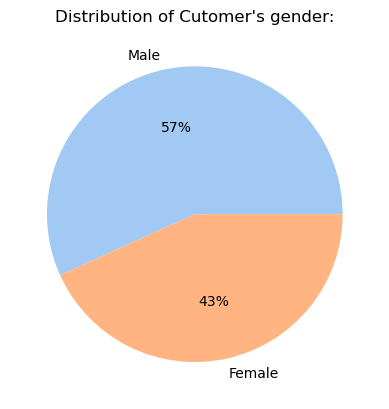

Distribution of cutomer's gender:
249934 Male
190355 Female


In [17]:
# Visulization of gender

make_piechart(main_df, 'gender')

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> The pie chart shows the company has more male customers than female customers.
</div>

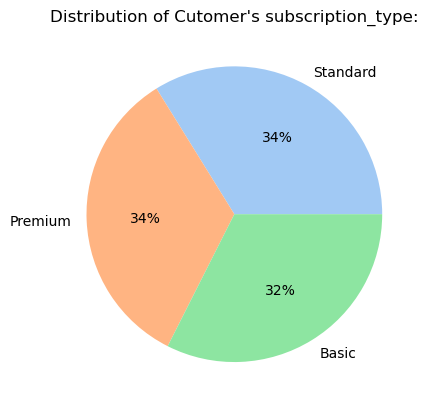

Distribution of cutomer's subscription_type:
148953 Standard
148491 Premium
142845 Basic


In [18]:
# Visualization of subscription_type

make_piechart(main_df, 'subscription_type')

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> According to the pie chart, all the subscription types are available in the same amount within the company.
</div>

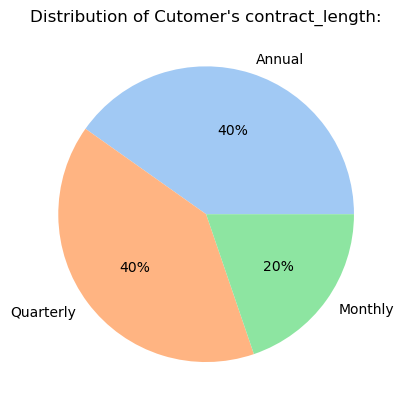

Distribution of cutomer's contract_length:
176974 Annual
176310 Quarterly
87005 Monthly


In [19]:
# Visualization of contract length

make_piechart(main_df, 'contract_length')

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Annual and quarterly contracts have similar and the highest amount, while monthly contracts with the lowest customers.
</div>

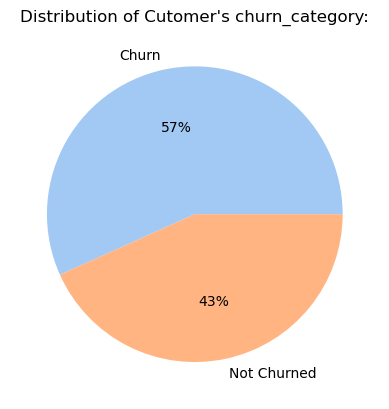

Distribution of cutomer's churn_category:
249708 Churn
190581 Not Churned


In [20]:
filtered = main_df.copy()
filtered['churn_category'] = ['Churn' if x == 1.0 else 'Not Churned' for x in main_df['churn']]
make_piechart(filtered, 'churn_category')

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> The dataset contains more customers as churned customers.
</div>


### 4.2.2 Analysing for Discrete Data

In [21]:
# Making the customized functions for bar-plot and box-plot

def make_barplot(df, target_feature, custom_ticks=None, unit='', additional='', color="blue"):
    plt.figure(figsize=(10, 5))
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    plt.bar(keys, data, color=color)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.xlabel(f'{target_feature.capitalize()}{additional}')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of customer's {target_feature.lower()}{additional}\n")
    plt.grid(axis='y')
    plt.show()
    print(f"Distribution of customer's {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n\n{df[target_feature].skew():.3f} Skewness\n")

    
def make_boxplot(df, feature, color='blue'):  
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=feature, color=color,
                boxprops=dict(facecolor=color, color=color),
                whiskerprops=dict(color=color),
                capprops=dict(color=color),
                medianprops=dict(color='red'))  
    plt.title(f"Boxplot of {feature}\n")
    plt.xlabel(feature)
    plt.ylabel("Values")
    plt.show()

##### Visualizing the Age Column

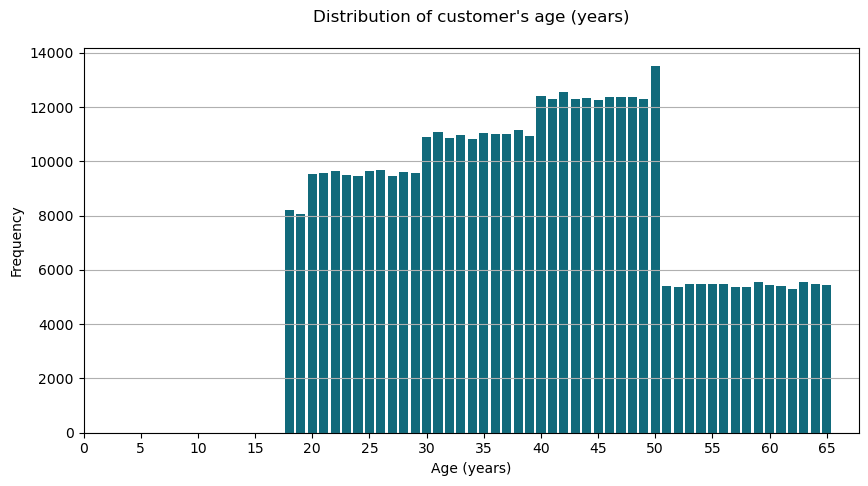

Distribution of customer's age (years): 39.37 ± 39.00 years
Median: 39.00 years
Minimum: 18 years
Maximum: 65 years

0.162 Skewness



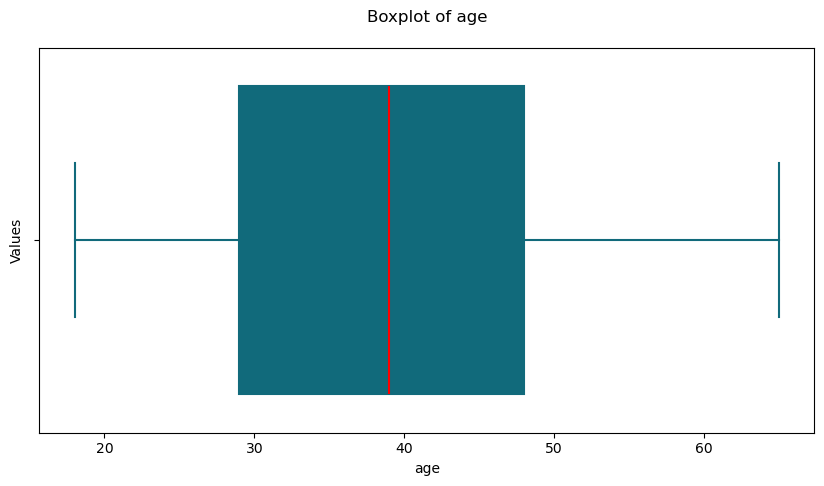

In [22]:
make_barplot(main_df, 'age', custom_ticks=np.arange(0, 66, 5), additional=' (years)', unit='years', color="#116A7B")

make_boxplot(main_df, 'age', color="#116A7B")

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Most customers are aged 40-50 age range.
</div>

##### Visualizing the Tenure Column

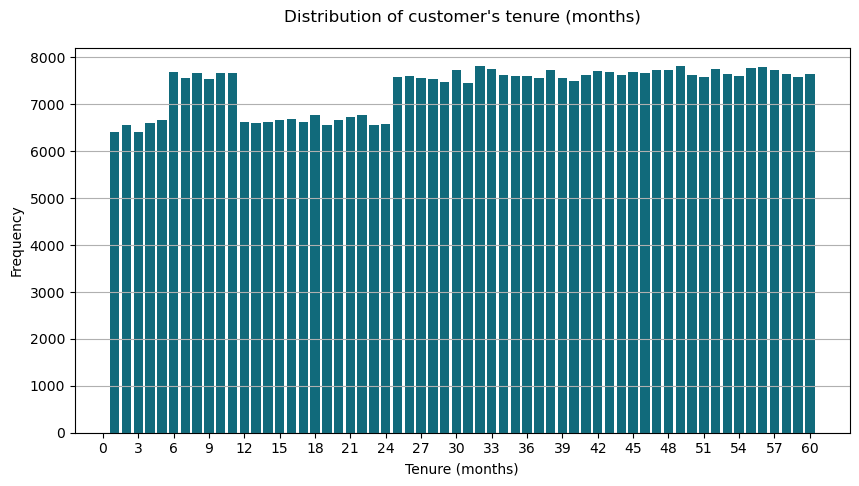

Distribution of customer's tenure (months): 31.26 ± 32.00 months
Median: 32.00 months
Minimum: 1 months
Maximum: 60 months

-0.061 Skewness



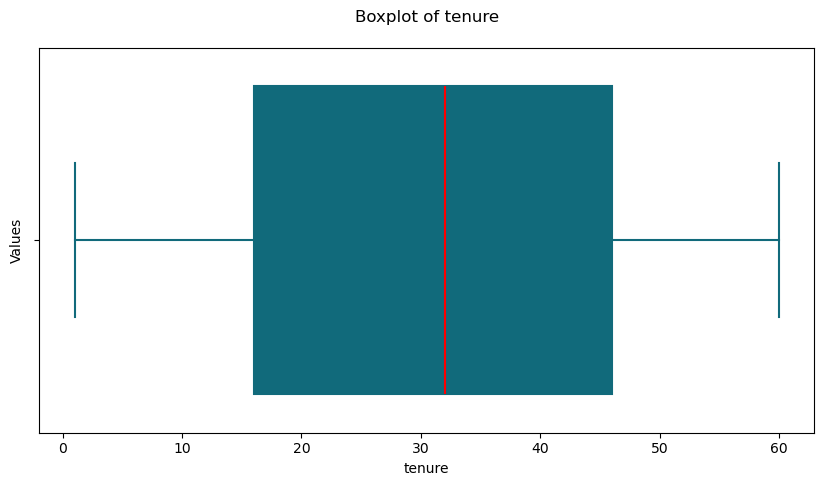

In [23]:
make_barplot(main_df, 'tenure', custom_ticks=np.arange(0, 61, 3), additional=' (months)', unit='months', color ="#116A7B")

make_boxplot(main_df, 'tenure', color ="#116A7B")

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Customers tend to have longer tenures with customer departures being more common during the 1-5 month and 12-24 month tenure periods.
</div>

##### Visualizing the Usage Frequency Column

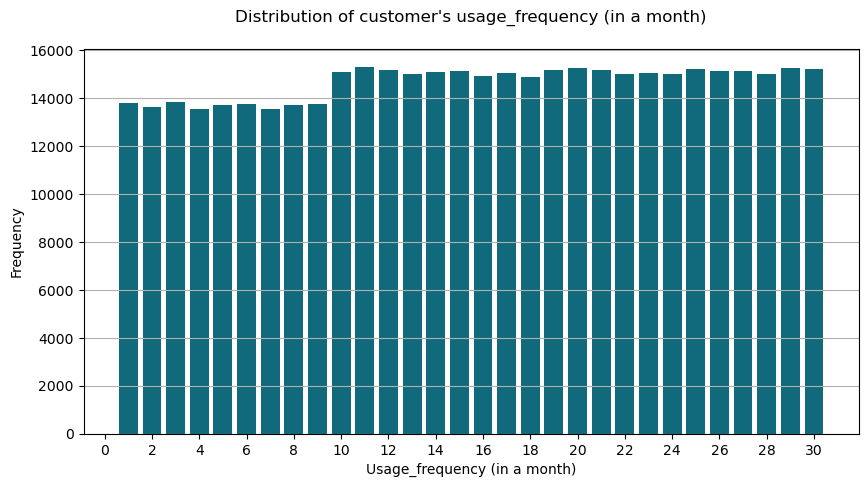

Distribution of customer's usage_frequency (in a month): 15.81 ± 16.00 times
Median: 16.00 times
Minimum: 1 times
Maximum: 30 times

-0.043 Skewness



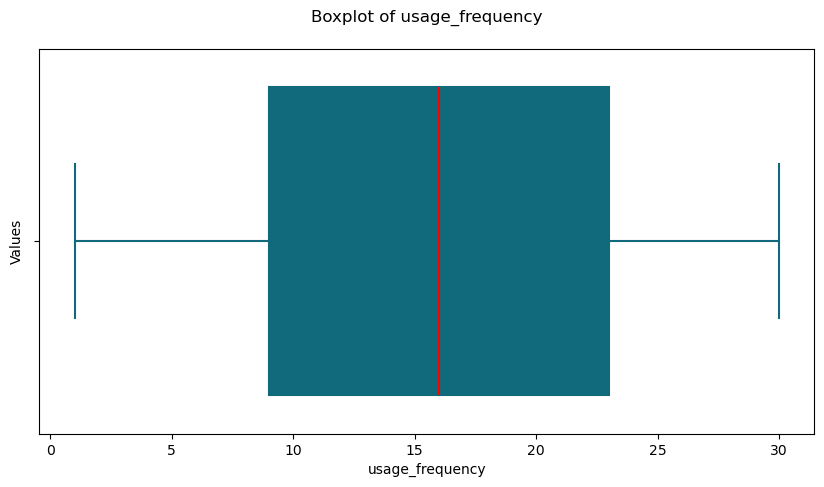

In [24]:
make_barplot(main_df, 'usage_frequency', custom_ticks=np.arange(0, 31, 2), unit='times', additional=' (in a month)' , color ="#116A7B")

make_boxplot(main_df, 'usage_frequency' , color ="#116A7B")

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> On average, customers tend to use company's services 16 times in a month
</div>

##### Visualizing the Support Calls Column

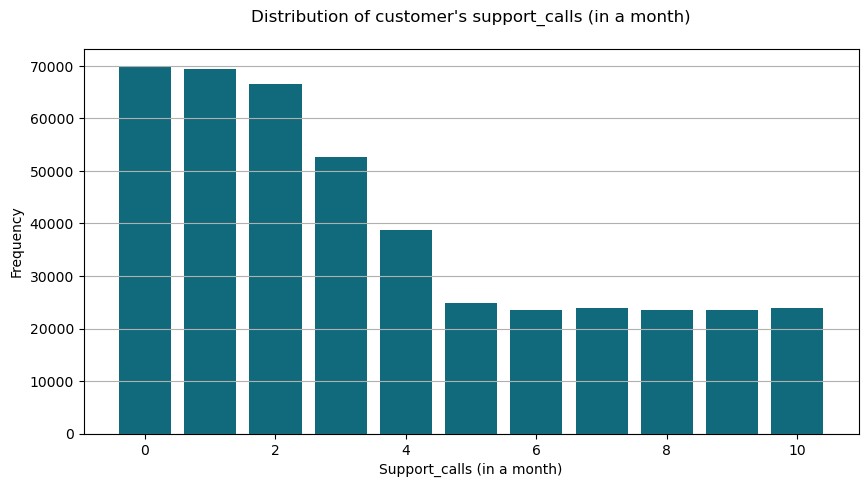

Distribution of customer's support_calls (in a month): 3.60 ± 3.00 calls
Median: 3.00 calls
Minimum: 0 calls
Maximum: 10 calls

0.667 Skewness



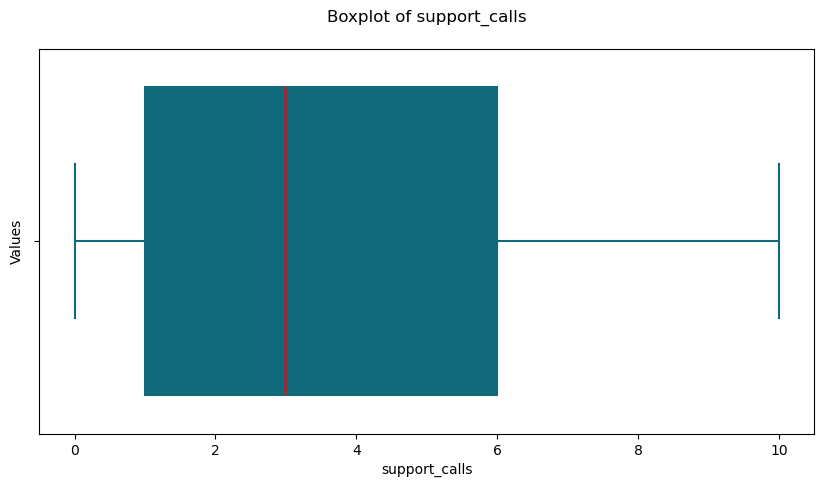

In [25]:
make_barplot(main_df, 'support_calls', unit='calls', additional=' (in a month)', color ="#116A7B")

make_boxplot(main_df, 'support_calls' , color ="#116A7B")

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> On average, customers tend to make 3 support calls in a month.
</div>

##### Visualizing the Payment Delay Column

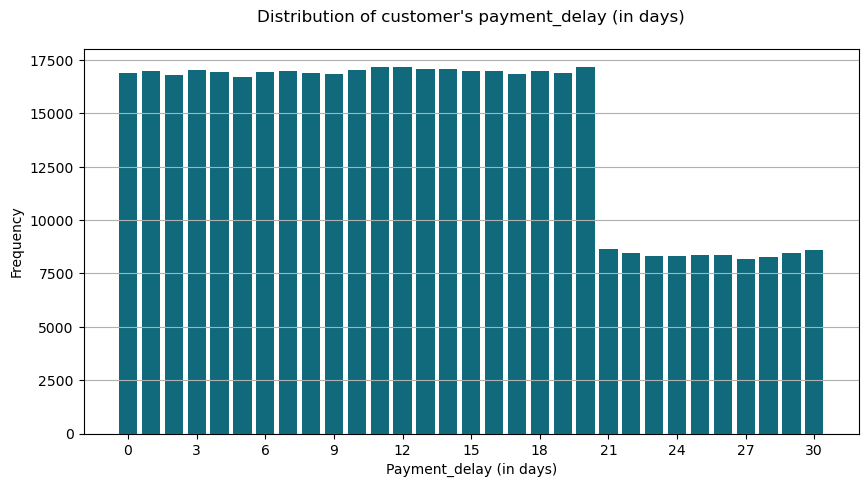

Distribution of customer's payment_delay (in days): 12.97 ± 12.00 days
Median: 12.00 days
Minimum: 0 days
Maximum: 30 days

0.267 Skewness



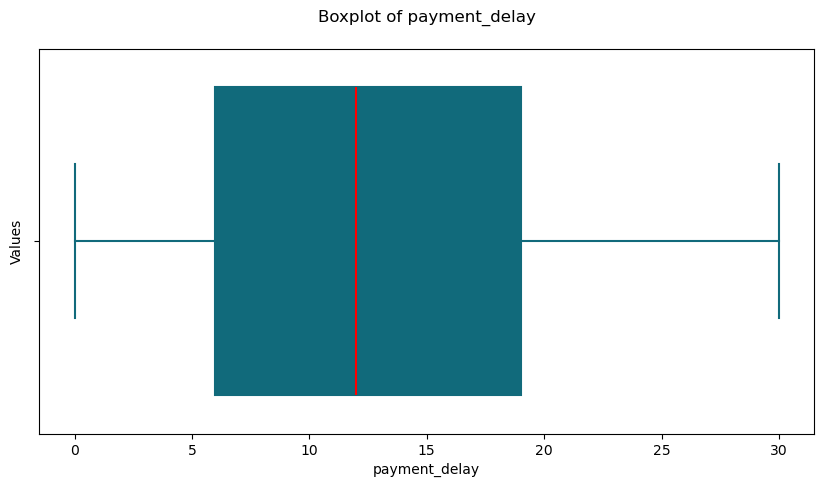

In [26]:
make_barplot(main_df, 'payment_delay', custom_ticks=np.arange(0, 32, 3), unit='days', additional=' (in days)', color ="#116A7B")

make_boxplot(main_df, 'payment_delay' , color ="#116A7B")

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> On average, customers tend to delay their payments by 13 days
</div>

##### Visualizing the Customer's Last Interaction Column

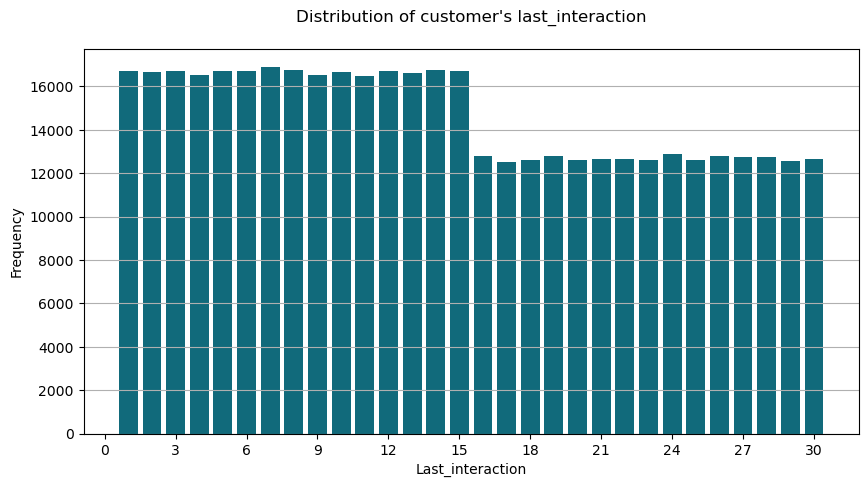

Distribution of customer's last_interaction: 14.48 ± 14.00 days
Median: 14.00 days
Minimum: 1 days
Maximum: 30 days

0.177 Skewness



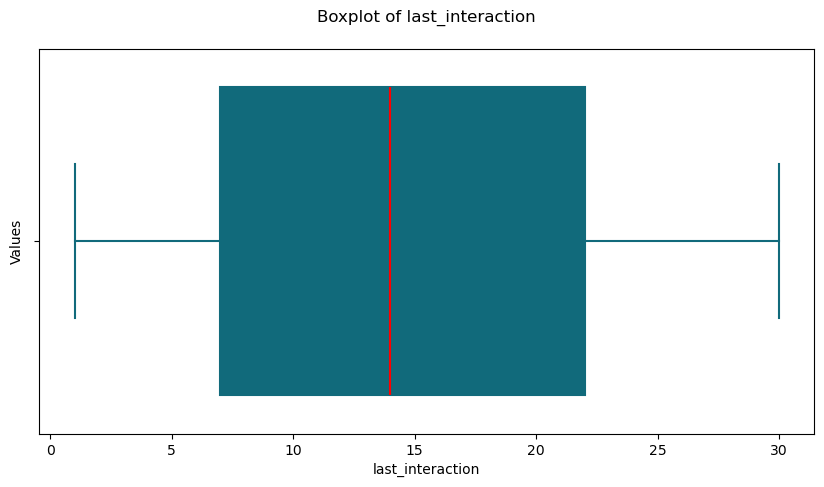

In [27]:
make_barplot(main_df, 'last_interaction', custom_ticks=np.arange(0, 32, 3), unit='days', additional='',  color ="#116A7B")

make_boxplot(main_df, 'last_interaction',  color ="#116A7B")

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Most customers tend to have 15 or less last interaction with average around 14 days
</div>

### 4.2.3 Analysing for Continues Data

In [28]:
# Custom function to make histogram

def make_histogram(df, target_feature, bins = 10, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    plt.hist(df[target_feature], bins=bins)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.ylabel('Count')
    plt.xlabel(target_feature)
    plt.title(f"Distribution of {target_feature.lower()}{additional}:\n")
    plt.grid()
    plt.show()
    print(f"Distribution of {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n{df[target_feature].skew():.3f} Skewness\n")

##### Visualizing the Total Spend on Products/Services Column

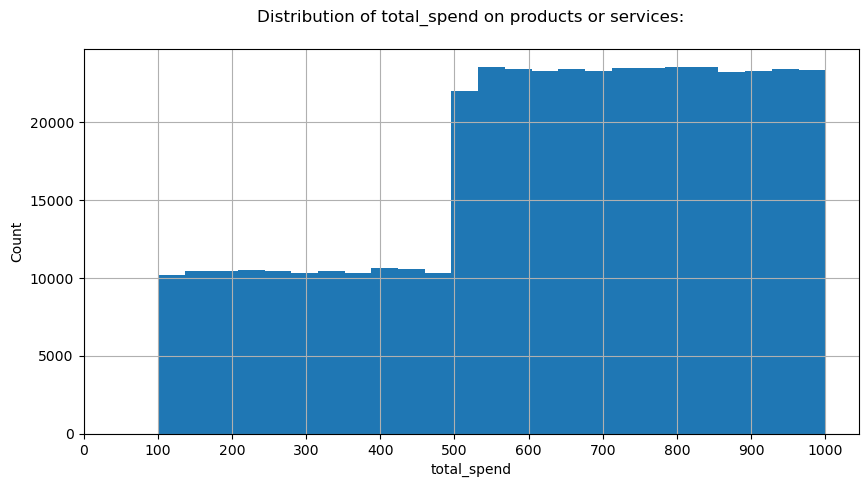

Distribution of total_spend on products or services: 631.34 ± 661.00 USD
Median: 661.00 USD
Minimum: 100 USD
Maximum: 1000 USD
-0.457 Skewness



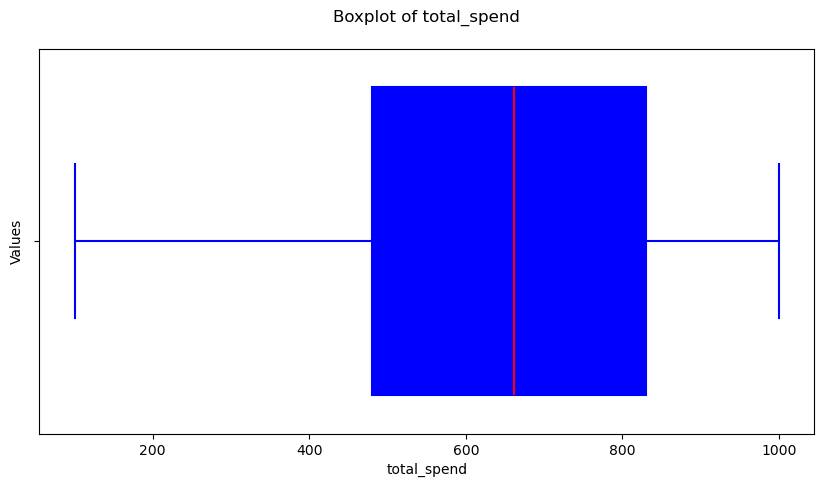

In [29]:
make_histogram(main_df, 'total_spend', bins=25, custom_ticks=np.arange(0, 1001, 100), unit='USD', additional=" on products or services")

make_boxplot(main_df, 'total_spend')

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> According to the histogram, the division between customers who spend more and less is around 500.
</div>

## 4.3 Multivariate Analysis

### 4.3.1 Gender Vs Churn Rate

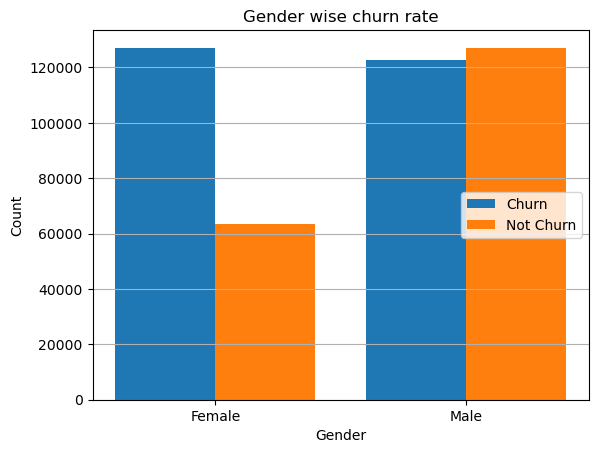

In [30]:
gender_churn = main_df.groupby(['gender', 'churn']).size().unstack()

X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:, 0])
churn_1 = list(gender_churn.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender wise churn rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Female customers exhibit a slightly higher churn rate compared to male customers.
</div>

### 4.3.2 Payment Delays Vs Churn Rate

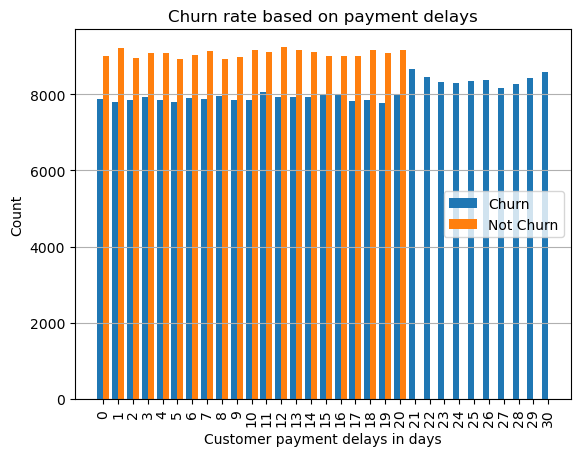

In [31]:
filtered = main_df.groupby(['payment_delay', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer payment delays in days")
plt.ylabel('Count')
plt.title("Churn rate based on payment delays")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Customers who are not churned tend to have higher payment delay days as compared with churned customers till day 20
</div>

### 4.3.3 Usage Frequency Vs Churn Rate

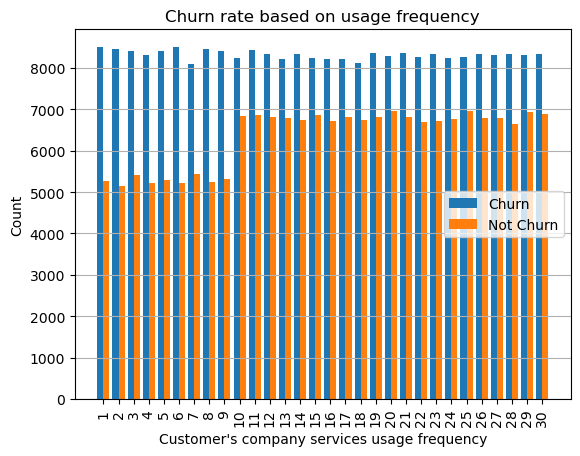

In [32]:
filtered = main_df.groupby(['usage_frequency', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer's company services usage frequency")
plt.ylabel('Count')
plt.title("Churn rate based on usage frequency")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Churned customer tend to use company's services significantly more than customers who are not churned.
</div>

### 4.3.4 Tenures Vs Churn Rate

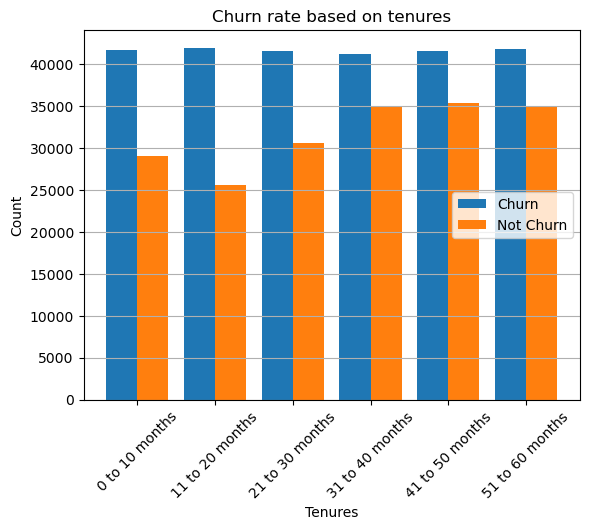

In [33]:
# Function to categorize age into defined segments
def categorize_age(age):
    if 0 <= age <= 10:
        return '0 to 10 months'
    elif 11 <= age <= 20:
        return '11 to 20 months'
    elif 21 <= age <= 30:
        return '21 to 30 months'
    elif 31 <= age <= 40:
        return '31 to 40 months'
    elif 41 <= age <= 50:
        return '41 to 50 months'
    elif 51 <= age <= 60:
        return '51 to 60 months'
    else:
        pass 

filtered = main_df.copy()
filtered['tenure_segmentation'] = main_df['tenure'].apply(categorize_age)
filtered = filtered.groupby(['tenure_segmentation', 'churn']).size().unstack()

# Extract the tenure segments and the counts of churn and not churn for each segment
X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Tenures')
plt.ylabel('Count')
plt.title("Churn rate based on tenures")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Customers with longer tenures are more likely to churn.
</div>

### 4.3.5 Support Calls Vs Churn Rate

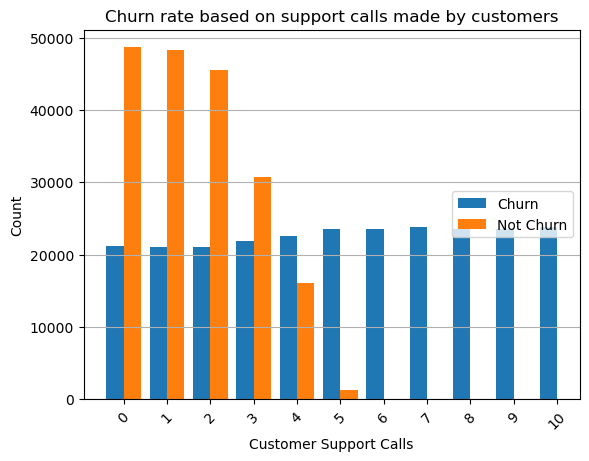

In [34]:
filtered = main_df.groupby(['support_calls', 'churn']).size().unstack()

# Extract the number of support calls and the counts of churn and not churn for each group
X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Customer Support Calls')
plt.ylabel('Count')
plt.title("Churn rate based on support calls made by customers")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Customers with more support calls tend to churn more.
</div>

### 4.3.6 Customer Support Vs Churn Rate

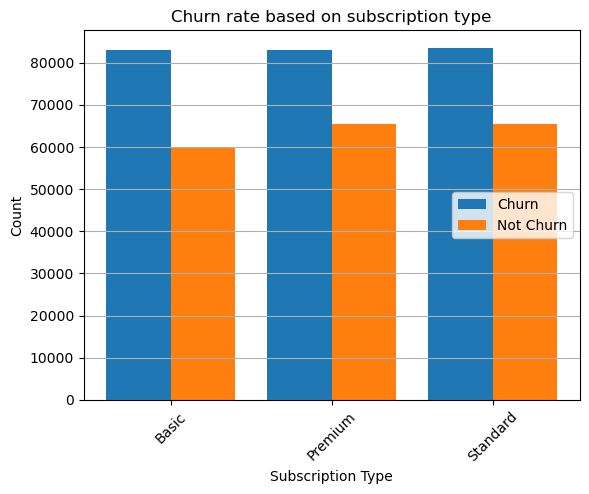

In [35]:
filtered = main_df.groupby(['subscription_type', 'churn']).size().unstack()

# Extract the number of Customer Support and the counts of churn and not churn for each group
X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title("Churn rate based on subscription type")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Subscription type does not influence customer churn rate
</div>

### 4.3.7 Contract Length Vs Churn Rate

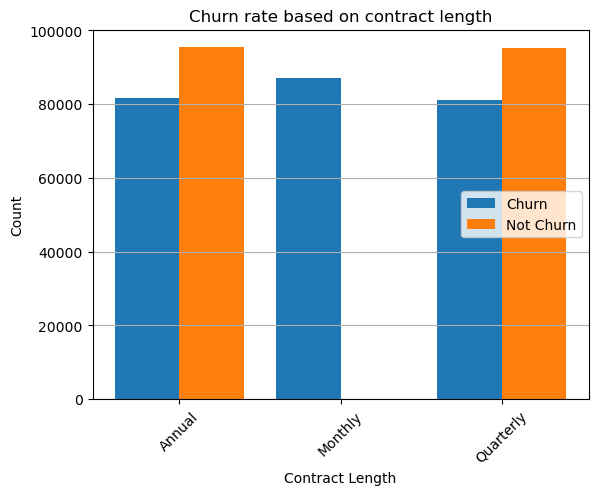

In [36]:
filtered = main_df.groupby(['contract_length', 'churn']).size().unstack()

# Extract the number of Contract Length and the counts of churn and not churn for each group
X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title("Churn rate based on contract length")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Customers with quarterly contract lengths have the lowest churn rate
</div>

### 4.3.8 Relation Between Total Spend and Churn Rate

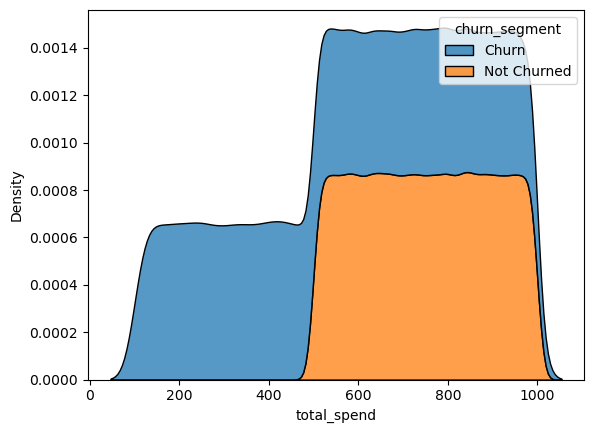

In [37]:
filtered = main_df.copy()

# Create a new column 'churn_segment' based on the 'churn' column
filtered['churn_segment'] = ['Churn' if x == 1.0 else 'Not Churned' for x in main_df['churn']]

sns.kdeplot(data=filtered, x="total_spend", hue="churn_segment", multiple="stack")
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> Customers who churn tends to spend significantly more money than those who don't.
</div>

## 4.4 Checking for Duplicates

In [38]:
main_df[main_df.duplicated()]

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
> There is no duplicates
</div>

# 5 Outlier Detection - Interquartile Range (IQR) Method

In [39]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers as data points that are below the lower bound or above the upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

## 5.1 Outlier Detection for Age Column

In [40]:
outliers_iqr_age = detect_outliers_iqr(main_df, 'age')
print("Outliers detected in 'age':")
outliers_iqr_age

Outliers detected in 'age':


,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


## 5.2 Outlier Detection for Tenure Column

In [41]:
outliers_iqr_tenure = detect_outliers_iqr(main_df, 'tenure')
print("Outliers detected in 'tenure':")
outliers_iqr_tenure

Outliers detected in 'tenure':


,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


## 5.3 Outlier Detection for Usage Frequency Column

In [42]:
outliers_iqr_usage_frequency = detect_outliers_iqr(main_df, 'usage_frequency')
print("Outliers detected in 'usage_frequency':")
outliers_iqr_usage_frequency

Outliers detected in 'usage_frequency':


,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


## 5.4 Outlier Detection for Support Calls Column

In [43]:
outliers_iqr_support_calls = detect_outliers_iqr(main_df, 'support_calls')
print("Outliers detected in 'support_calls':")
outliers_iqr_support_calls

Outliers detected in 'support_calls':


,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


## 5.5 Outlier Detection for Payment Delay Column

In [44]:
outliers_iqr_payment_delay = detect_outliers_iqr(main_df, 'payment_delay')
print("Outliers detected in 'payment_delay':")
outliers_iqr_payment_delay

Outliers detected in 'payment_delay':


,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


## 5.6 Outlier Detection for Total Spend Column

In [45]:
outliers_iqr_total_spend = detect_outliers_iqr(main_df, 'total_spend')
print("Outliers detected in 'total_spend':")
outliers_iqr_total_spend

Outliers detected in 'total_spend':


,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


## 5.7 Outlier Detection for Last Interaction Column

In [46]:
outliers_iqr_last_interaction = detect_outliers_iqr(main_df, 'last_interaction')
print("Outliers detected in 'last_interaction':")
outliers_iqr_last_interaction

Outliers detected in 'last_interaction':


,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
<h4>Observation:-</h4>
    <ul>
        <li>Outlier detection is done for features.</li>
        <li>There is no any outlier detected </li>
    </ul>
</div>

# 6 Data Encoding - One Hot Encoding

In [47]:
categorical_columns = ['gender', 'subscription_type', 'contract_length']

# Extract categorical features
categorical_data = main_df[categorical_columns]
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical features
encoded_data = one_hot_encoder.fit_transform(categorical_data)

In [48]:
# Get the feature names from OneHotEncoder
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=main_df.index)

main_droped_df = main_df.copy()
main_droped_df.drop(columns=categorical_columns, inplace=True)

# Concatenate customer_df with encoded_df
one_hot_encoded_df = pd.concat([main_droped_df, encoded_df], axis=1)

one_hot_encoded_df

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn,gender_Male,subscription_type_Premium,subscription_type_Standard,contract_length_Monthly,contract_length_Quarterly
0,30,39,14,5,18,932,17,1,0.0,0.0,1.0,0.0,0.0
1,65,49,1,10,8,557,6,1,0.0,0.0,0.0,1.0,0.0
2,55,14,4,6,18,185,3,1,0.0,0.0,0.0,0.0,1.0
3,58,38,21,7,7,396,29,1,1.0,0.0,1.0,1.0,0.0
4,23,32,20,5,8,617,20,1,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42,54,15,1,3,716,8,0,1.0,1.0,0.0,0.0,0.0
440829,25,8,13,1,20,745,2,0,0.0,1.0,0.0,0.0,0.0
440830,26,35,27,1,5,977,9,0,1.0,0.0,1.0,0.0,1.0
440831,28,55,14,2,0,602,2,0,1.0,0.0,1.0,0.0,1.0


# 7 Feature Scaling - Normalization

In [49]:
normalized_df =one_hot_encoded_df.copy()

scaler = MinMaxScaler(feature_range=(0,1))

numeric_columns = ['age', 'tenure','usage_frequency','usage_frequency','support_calls','payment_delay','total_spend','last_interaction']

# Loop through each numeric column to apply MinMax scaling
for column in numeric_columns:
    column_data = normalized_df[column].values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(column_data)
    normalized_df[column] = scaled_data

normalized_df

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn,gender_Male,subscription_type_Premium,subscription_type_Standard,contract_length_Monthly,contract_length_Quarterly
0,0.255319,0.644068,0.448276,0.5,0.600000,0.924444,0.551724,1,0.0,0.0,1.0,0.0,0.0
1,1.000000,0.813559,0.000000,1.0,0.266667,0.507778,0.172414,1,0.0,0.0,0.0,1.0,0.0
2,0.787234,0.220339,0.103448,0.6,0.600000,0.094444,0.068966,1,0.0,0.0,0.0,0.0,1.0
3,0.851064,0.627119,0.689655,0.7,0.233333,0.328889,0.965517,1,1.0,0.0,1.0,1.0,0.0
4,0.106383,0.525424,0.655172,0.5,0.266667,0.574444,0.655172,1,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,0.510638,0.898305,0.482759,0.1,0.100000,0.684444,0.241379,0,1.0,1.0,0.0,0.0,0.0
440829,0.148936,0.118644,0.413793,0.1,0.666667,0.716667,0.034483,0,0.0,1.0,0.0,0.0,0.0
440830,0.170213,0.576271,0.896552,0.1,0.166667,0.974444,0.275862,0,1.0,0.0,1.0,0.0,1.0
440831,0.212766,0.915254,0.448276,0.2,0.000000,0.557778,0.034483,0,1.0,0.0,1.0,0.0,1.0


# 8 Data Balancing - SMOTE Method

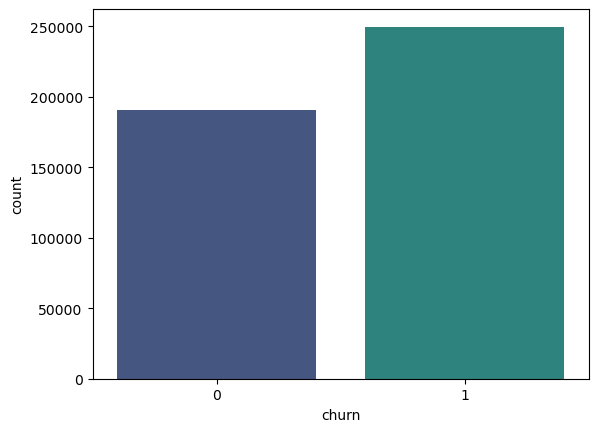

In [50]:
colors = sns.color_palette("viridis", 3)
sns.countplot(x='churn', data=normalized_df, palette=colors)
plt.show()

In [51]:
inbalance_X = normalized_df.drop(['churn'], axis=1)
inbalance_y = normalized_df['churn']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(inbalance_X, inbalance_y)

# Create a new DataFrame with balanced data
balanced_df = pd.concat([pd.DataFrame(y_balanced, columns=['churn']), pd.DataFrame(X_balanced, columns=inbalance_X.columns)], axis=1)

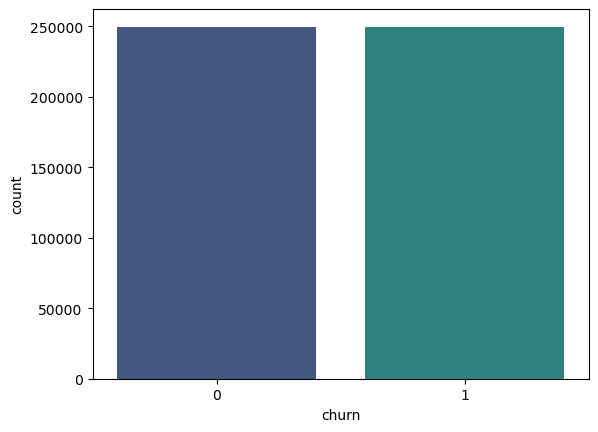

In [52]:
colors = sns.color_palette("viridis", 3)
sns.countplot(x='churn', data=balanced_df, palette=colors)
plt.show()

# 9 Feature Selection

## 9.1 Correlation Matrix and Heat Map Visualization

### 9.1.1 Independent Features Correlation

In [53]:
independent_features_df = balanced_df.select_dtypes(include=['number']).copy().drop(columns=['churn'])

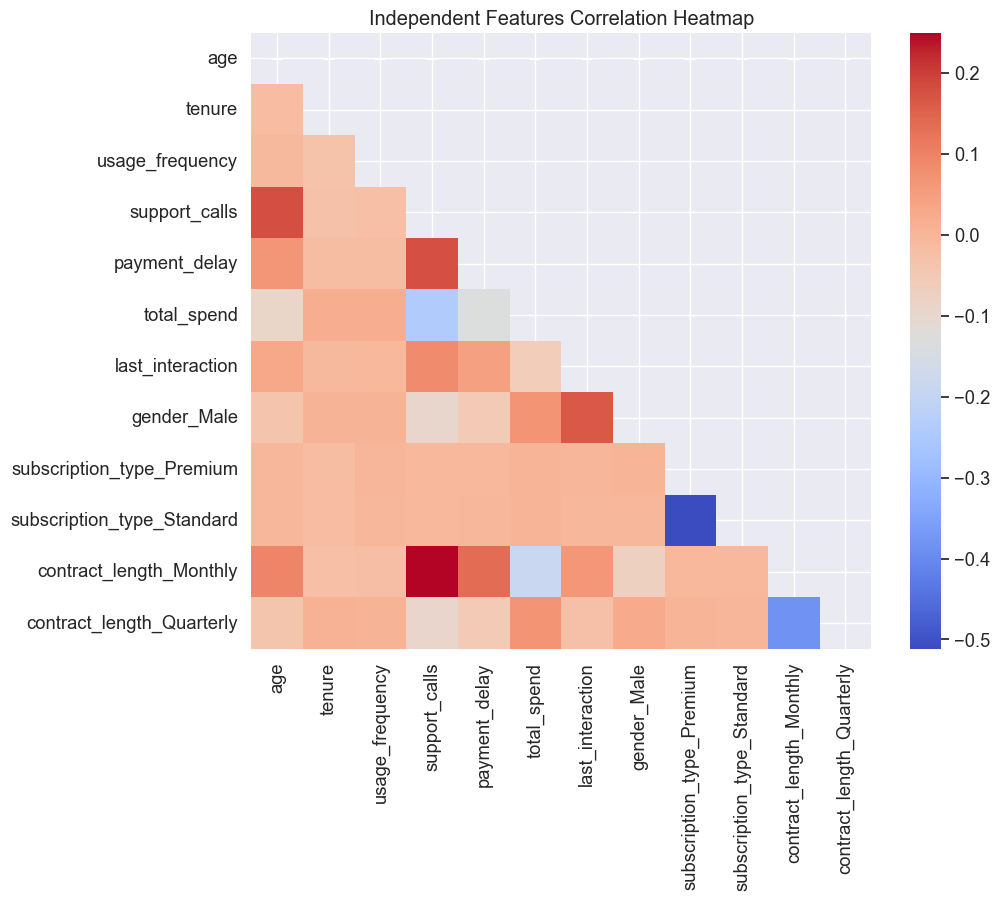

In [54]:
corr_matrix = independent_features_df.corr()

# Creating a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Independent Features Correlation Heatmap")
plt.show()

### 9.1.2 Inpedendent features correlation with prediction labels

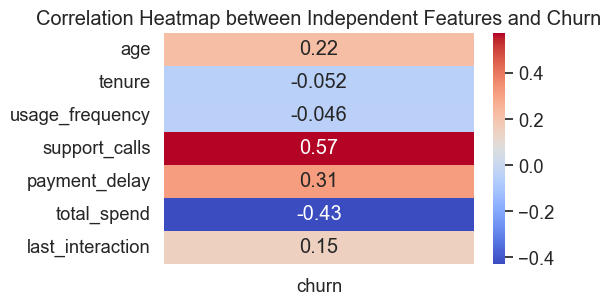

In [55]:
correlation_data = main_df.select_dtypes(include=['number']).corr().loc[:'last_interaction', 'churn']

# Create a heatmap
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)
sns.heatmap(correlation_data.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap between Independent Features and Churn")
plt.show()

## 9.2 Mutual Information Feature Selection

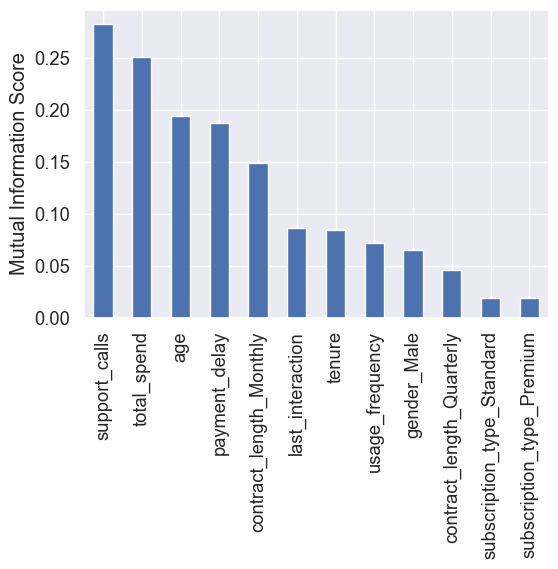

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate features and target variable
features = balanced_df.drop('churn', axis=1)
target = balanced_df['churn']

# Feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=12)
selector.fit(features, target)

# Create a Series with the scores
mutual_info_scores = pd.Series(selector.scores_, index=features.columns)
mutual_info_scores.sort_values(ascending=False).plot.bar(figsize=(6, 4))
plt.ylabel('Mutual Information Score')
plt.show()

In [57]:
# Transform the dataset to select the top k features
selected_features = selector.transform(features)
selected_features = pd.DataFrame(selected_features, columns=features.columns[selector.get_support()])
selected_features.head()

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Male,subscription_type_Premium,subscription_type_Standard,contract_length_Monthly,contract_length_Quarterly
0,0.255319,0.644068,0.448276,0.5,0.600000,0.924444,0.551724,0.0,0.0,1.0,0.0,0.0
1,1.000000,0.813559,0.000000,1.0,0.266667,0.507778,0.172414,0.0,0.0,0.0,1.0,0.0
2,0.787234,0.220339,0.103448,0.6,0.600000,0.094444,0.068966,0.0,0.0,0.0,0.0,1.0
3,0.851064,0.627119,0.689655,0.7,0.233333,0.328889,0.965517,1.0,0.0,1.0,1.0,0.0
4,0.106383,0.525424,0.655172,0.5,0.266667,0.574444,0.655172,1.0,0.0,0.0,1.0,0.0


# 10. Train-Test Split

In [58]:
y = target
X = selected_features

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Reset the index of the resulting DataFrames
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [60]:
X_train

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Male,subscription_type_Premium,subscription_type_Standard,contract_length_Monthly,contract_length_Quarterly
0,0.382979,0.423729,0.379310,0.0,0.233333,0.541111,0.758621,1.0,0.0,1.0,0.0,1.0
1,0.617021,0.474576,0.379310,0.1,0.400000,0.507778,0.413793,0.0,1.0,0.0,0.0,0.0
2,0.936170,0.271186,0.310345,0.7,0.200000,0.593333,0.448276,0.0,1.0,0.0,0.0,1.0
3,0.744681,0.220339,0.241379,0.6,0.000000,0.233333,0.344828,1.0,1.0,0.0,1.0,0.0
4,0.127660,0.203390,0.344828,0.8,0.666667,0.124444,0.000000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
399527,0.510638,0.796610,0.206897,0.2,0.066667,0.668889,0.000000,1.0,0.0,1.0,0.0,1.0
399528,0.234043,0.000000,0.310345,0.2,0.733333,0.533333,0.827586,0.0,1.0,0.0,0.0,1.0
399529,0.297872,0.542373,0.689655,0.1,0.100000,0.616667,0.551724,1.0,0.0,1.0,0.0,1.0
399530,0.042553,0.118644,0.413793,0.7,0.000000,0.884444,0.482759,1.0,0.0,0.0,1.0,0.0


In [61]:
X_test

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Male,subscription_type_Premium,subscription_type_Standard,contract_length_Monthly,contract_length_Quarterly
0,0.255319,0.525424,0.827586,0.10000,0.566667,0.876667,0.448276,1.0,0.0,1.0,0.0,1.0
1,0.191489,0.423729,0.172414,0.80000,0.633333,0.403333,0.137931,0.0,1.0,0.0,0.0,0.0
2,0.042553,0.033898,0.206897,0.30000,0.366667,0.757778,0.862069,0.0,1.0,0.0,1.0,0.0
3,0.212766,0.220339,0.137931,0.40000,0.866667,0.600000,0.482759,0.0,0.0,1.0,0.0,1.0
4,0.702128,0.932203,0.931034,0.40000,0.733333,0.790000,0.586207,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99879,0.680851,0.135593,0.275862,0.30000,0.566667,0.708889,0.310345,1.0,0.0,1.0,0.0,1.0
99880,0.670492,0.872659,0.879762,0.04869,0.200000,0.953491,0.205993,1.0,0.0,0.0,0.0,1.0
99881,0.148936,0.101695,0.793103,0.90000,0.100000,0.208889,0.482759,1.0,0.0,0.0,0.0,1.0
99882,0.702128,0.508475,0.172414,1.00000,0.866667,0.501111,0.068966,1.0,1.0,0.0,1.0,0.0


# 11 Baseline Models

In [62]:
def print_evaluation_metrics(y_true, y_pred):
    
# Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

    class_report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(class_report)

# Plotting the evaluation metrics as a bar chart
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    metrics_values = [accuracy, precision, recall, f1]
    plt.figure(figsize=(8, 6))
    plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'orange'])
    plt.title('Model Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)  
    plt.show()

# 12 K-Fold Cross Validation

In [63]:
def k_fold_cross_validation_with_metrics(classifier, X, y, k_folds=5):
    
    # Initializing stratified k-fold cross-validation
    stratified_kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Lists to store the evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in stratified_kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics for this fold
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Append the metrics to their respective lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)

    print("Mean Metrics Across Folds:")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Mean Precision: {mean_precision:.2f}")
    print(f"Mean Recall: {mean_recall:.2f}")
    print(f"Mean F1 Score: {mean_f1:.2f}")

## 12.1 K-Fold Cross Validation with Logistic Regression

In [64]:
model = LogisticRegression()

k_fold_cross_validation_with_metrics(model, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.90
Mean Precision: 0.92
Mean Recall: 0.87
Mean F1 Score: 0.90


## 12.2 K-Fold Cross Validation with Naive Bayes

In [65]:
gnb = GaussianNB()

k_fold_cross_validation_with_metrics(gnb, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.79
Mean Precision: 1.00
Mean Recall: 0.57
Mean F1 Score: 0.73


## 12.3 K-Fold Cross Validation with k-Nearest Neighbor

In [66]:
naive_bayes_model = MultinomialNB()

k_fold_cross_validation_with_metrics(naive_bayes_model, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.82
Mean Precision: 0.95
Mean Recall: 0.68
Mean F1 Score: 0.79


## 12.4 K-Fold Cross Validation with Decision Trees

In [67]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

k_fold_cross_validation_with_metrics(decision_tree_model, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 1.00
Mean Precision: 1.00
Mean Recall: 1.00
Mean F1 Score: 1.00


## 12.5 K-Fold Cross Validation with Random Forest

In [68]:
random_forest_model = RandomForestClassifier(random_state=42)

k_fold_cross_validation_with_metrics(random_forest_model, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 1.00
Mean Precision: 1.00
Mean Recall: 1.00
Mean F1 Score: 1.00


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
<h4>Observation:-</h4>
    Decision Trees, Logistic Regression and Random Forest are having perfect score. Therefore I will use them to train the model.
</div>

# 13 Model Training

## 13.1 Logistic Regression

In [69]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## 13.2 Decision Tree

In [70]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 13.3 Random Forest

In [71]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 14 Model Evaluating

## 14.1 Training Evaluating

##### Logistic Regression

Accuracy: 0.90
Precision: 0.92
Recall: 0.87
F1 Score: 0.90

Confusion Matrix:
[[185852  14113]
 [ 25552 174015]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90    199965
           1       0.92      0.87      0.90    199567

    accuracy                           0.90    399532
   macro avg       0.90      0.90      0.90    399532
weighted avg       0.90      0.90      0.90    399532



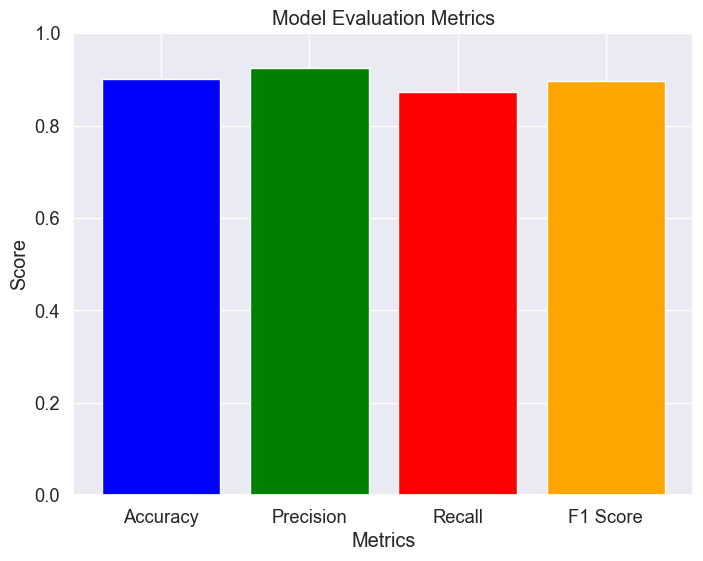

In [72]:
# Training Logistic Regression

y_train_pred = logistic_regression_model.predict(X_train)
print_evaluation_metrics(y_train, y_train_pred)

##### Decision Tree

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Confusion Matrix:
[[199965      0]
 [     0 199567]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199965
           1       1.00      1.00      1.00    199567

    accuracy                           1.00    399532
   macro avg       1.00      1.00      1.00    399532
weighted avg       1.00      1.00      1.00    399532



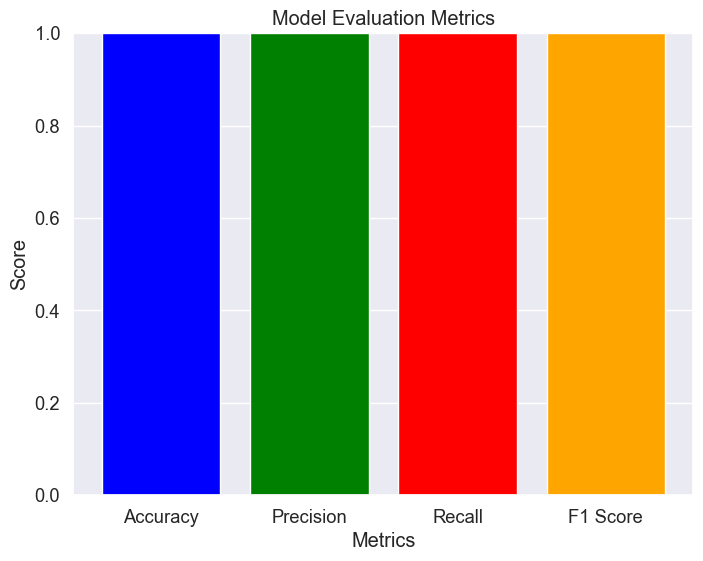

In [73]:
# Training Decision Tree

y_train_pred = decision_tree_model.predict(X_train)
print_evaluation_metrics(y_train, y_train_pred)

##### Random Forest

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Confusion Matrix:
[[199965      0]
 [     0 199567]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199965
           1       1.00      1.00      1.00    199567

    accuracy                           1.00    399532
   macro avg       1.00      1.00      1.00    399532
weighted avg       1.00      1.00      1.00    399532



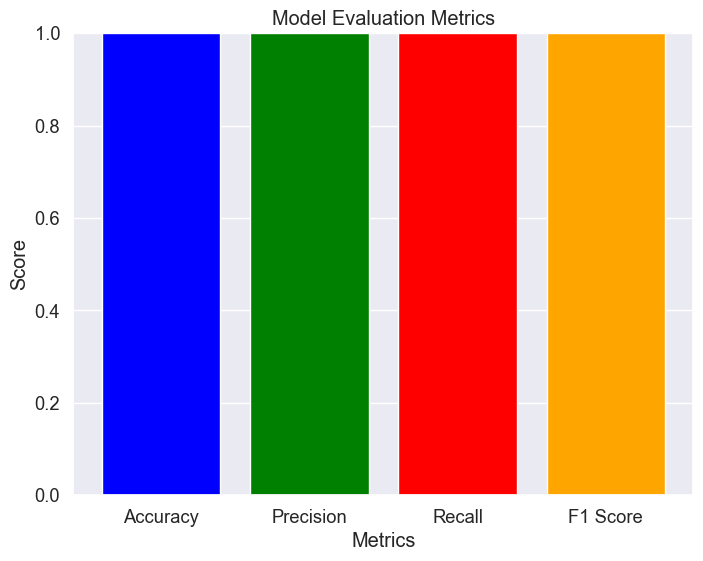

In [76]:
# Training Random Forest

y_train_pred = random_forest_model.predict(X_train)
print_evaluation_metrics(y_train, y_train_pred)

## 14.2 Testing Evaluating

##### Logistic Regression

Accuracy: 0.90
Precision: 0.93
Recall: 0.87
F1 Score: 0.90

Confusion Matrix:
[[46313  3430]
 [ 6537 43604]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     49743
           1       0.93      0.87      0.90     50141

    accuracy                           0.90     99884
   macro avg       0.90      0.90      0.90     99884
weighted avg       0.90      0.90      0.90     99884



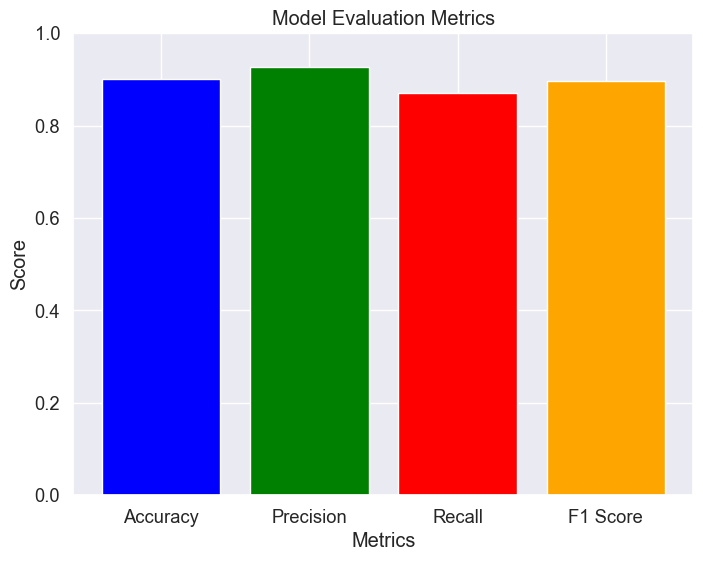

In [78]:
# Testing Logistic Regression

y_test_pred = logistic_regression_model.predict(X_test)
print_evaluation_metrics(y_test, y_test_pred)

##### Decision Tree

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Confusion Matrix:
[[49731    12]
 [   12 50129]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49743
           1       1.00      1.00      1.00     50141

    accuracy                           1.00     99884
   macro avg       1.00      1.00      1.00     99884
weighted avg       1.00      1.00      1.00     99884



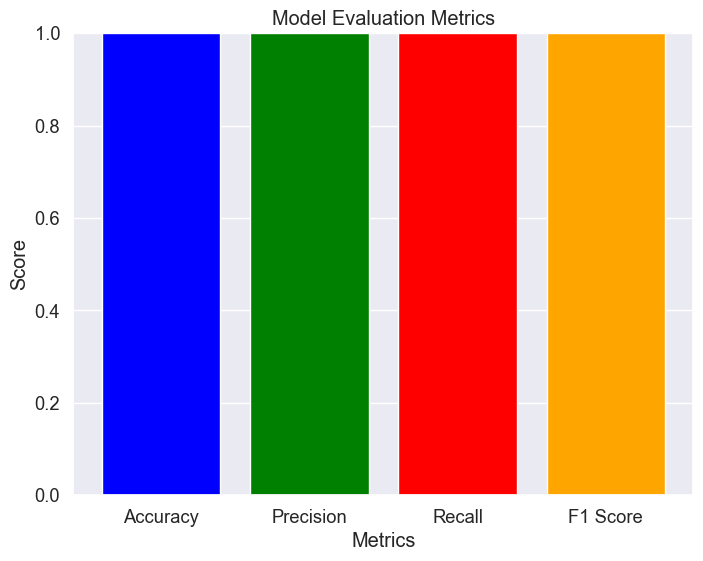

In [80]:
# Testing Decision Tree

y_test_pred = decision_tree_model.predict(X_test)
print_evaluation_metrics(y_test, y_test_pred)

##### Random Forest

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Confusion Matrix:
[[49741     2]
 [   26 50115]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49743
           1       1.00      1.00      1.00     50141

    accuracy                           1.00     99884
   macro avg       1.00      1.00      1.00     99884
weighted avg       1.00      1.00      1.00     99884



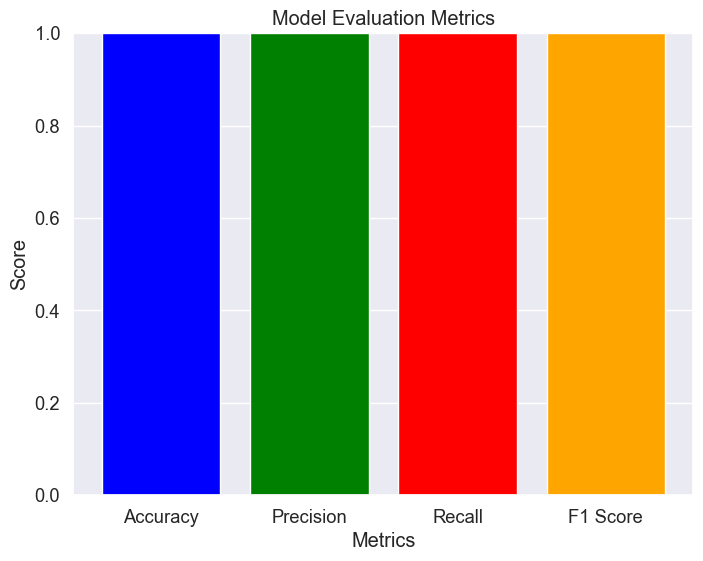

In [81]:
# Testing Random Forest

y_test_pred = random_forest_model.predict(X_test)
print_evaluation_metrics(y_test, y_test_pred)

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
<h4>Observation:-</h4>
    <ul>
        <li>I have observed that the results with Decision Tree and Random Forest are better.</li>
    </ul>
</div>

# 15. Hyperparameter Tunning

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">
<h4>Observation:-</h4>
    <ul>
        <li>Considering the overall performance and result of the model, No need to do hyperparameter tuning for this case.</li>
    </ul>
</div>

# 16. Saving the Best Models

In [82]:
with open('Best_Decision_Tree_Model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

In [83]:
with open('Best_Random_Forest_Model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)